In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:44<00:00, 26.3MB/s]
100% 1.06G/1.06G [00:44<00:00, 25.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize

def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid' ,activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [18]:
history= model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.3344 - accuracy: 0.6011 - val_loss: 0.7772 - val_accuracy: 0.5524
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5552 - accuracy: 0.7126 - val_loss: 0.5632 - val_accuracy: 0.7046
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4622 - accuracy: 0.7831 - val_loss: 0.8135 - val_accuracy: 0.6522
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4029 - accuracy: 0.8189 - val_loss: 0.4736 - val_accuracy: 0.7818
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3418 - accuracy: 0.8510 - val_loss: 0.7637 - val_accuracy: 0.6318
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2778 - accuracy: 0.8834 - val_loss: 1.0409 - val_accuracy: 0.6608
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1945 - accuracy: 0.9233 - val_loss: 0.7030 - val_ac

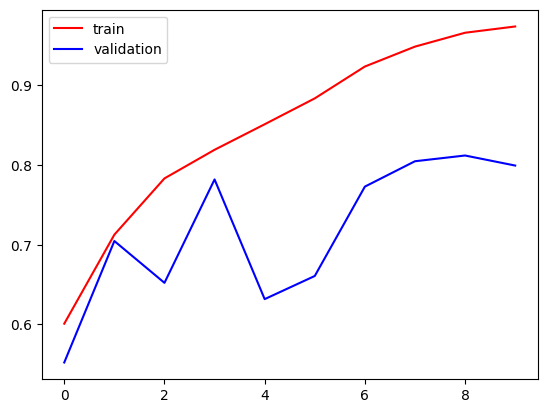

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()

plt.show()

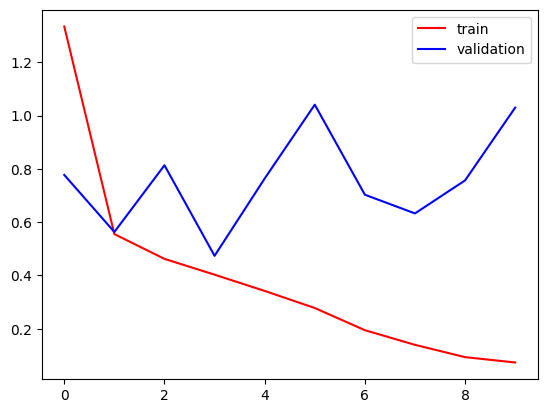

In [20]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()